In [79]:
"""

This code will filter through the movies data set and extract only movies released in 2016. 
From these movies it grabs the following information and stores them in a DataFrame...

budget, release_date, revenue, title

The last row, Gross revenue, is added by iterating over the rows and calculating (revenue - budget)

"""

import pandas as pd
data = pd.read_csv('movies_metadata.csv', header = 'infer')
cnt = 0

headers = list(data.columns.values)

new_rows = []
for index, row in data.iterrows():
    year = str(row['release_date'])[0:4]
    if year == '2016':
        new_rows.append(row)
        
movies = pd.DataFrame(new_rows, columns = headers) #get only movies released in 2016



col_list = ['budget', 'genres', 'title', 'release_date', 'revenue', 'id']

movies.drop(movies.columns.difference(col_list), 1, inplace=True) # get only desired columns

gross = []
genre = []
ids = []
for index, row in movies.iterrows():
    budget = int(row['budget'])
    revenue = int(row['revenue'])
    gross_revenue = revenue-budget
    gross.append(gross_revenue)
    genres = row['genres']
    i_d = row['id']
    
    
    index = genres.find('name')
    if index != -1:
        genres = genres[index+8:]
        close = genres.find("'")
        main_genre = genres[:close]
        genre.append(main_genre)
    else:
        genre.append(None)
    ids.append(str(i_d))

    
movies['gross_revenue'] = gross
movies['genres'] = genre
movies['id'] = ids

movies[0:20]

/Users/allisonlollo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,budget,genres,id,release_date,revenue,title,gross_revenue
22325,0,Comedy,194188,2016-02-11,0.000000e+00,Punk's Dead: SLC Punk 2,0
23634,0,None,295958,2016-07-15,0.000000e+00,Sound of Redemption: The Frank Morgan Story,0
25216,0,Thriller,307087,2016-05-17,0.000000e+00,The Ghost and the Whale,0
26556,100000000,Adventure,271969,2016-08-17,9.406131e+07,Ben-Hur,-5938689
26557,160000000,Action,68735,2016-05-25,4.336772e+08,Warcraft,273677183
26564,58000000,Action,293660,2016-02-09,7.831130e+08,Deadpool,725112979
26567,250000000,Adventure,271110,2016-04-27,1.153304e+09,Captain America: Civil War,903304495
26568,165000000,Action,284052,2016-10-25,6.777184e+08,Doctor Strange,512718395
26569,178000000,Science Fiction,246655,2016-05-18,5.439348e+08,X-Men: Apocalypse,365934787
27826,0,Adventure,310119,2016-05-13,0.000000e+00,Last Days in the Desert,0


In [80]:
"""

this code reades from another file credits.csv that contains more information needed 

Main actor
Director

"""


awards = pd.read_csv('credits.csv', header = 'infer')

ids = []
actors = []
directors = []
for index,row in awards.iterrows():
    cnt+=1
    r = row['cast']
    if r == "[]":
        continue
    i = r.find('}')
    r = r[1:i+1]
    r = r.strip("}").strip("{")
    
    r = r.split(',')
    if r[5].find('name') == -1:
        continue
    
    act = r[5].split(':')[1].strip().strip("'")
    i_d = row['id']
    
    direct = row['crew']
    ind = direct.find("'job': 'Director'")
    if ind == -1:
        continue
    
    direct = direct[ind+28:]
    end = direct.find("'")
    
    director = direct[:end]
    
    
    ids.append(str(i_d))
    actors.append(act)
    directors.append(director)
    

awards2 = pd.DataFrame()
awards2['id'] = ids
awards2['main_actor'] = actors
awards2['director'] = directors

awards2.head()

    




,id,main_actor,director
0,862,Tom Hanks,John Lasseter
1,8844,Robin Williams,Joe Johnston
2,15602,Walter Matthau,Howard Deutch
3,31357,Whitney Houston,Forest Whitaker
4,11862,Steve Martin,Charles Shyer


In [81]:
"""

This code takes the 2 tables and combines them on the condition that the ID's are the same

This gives one larger data frame with all the data combined

"""

all_movies_data = pd.merge(movies, awards2, how='inner', left_on = 'id', right_on = 'id')
all_movies_data.head()

,budget,genres,id,release_date,revenue,title,gross_revenue,main_actor,director
0,0,Comedy,194188,2016-02-11,0.000000e+00,Punk's Dead: SLC Punk 2,0,Ben Schnetzer,James Merendino
1,100000000,Adventure,271969,2016-08-17,9.406131e+07,Ben-Hur,-5938689,Jack Huston,Timur Bekmambetov
2,160000000,Action,68735,2016-05-25,4.336772e+08,Warcraft,273677183,Paula Patton,Duncan Jones
3,58000000,Action,293660,2016-02-09,7.831130e+08,Deadpool,725112979,Ryan Reynolds,Tim Miller
4,250000000,Adventure,271110,2016-04-27,1.153304e+09,Captain America: Civil War,903304495,Chris Evans,Anthony Russo


In [82]:
"""

This code pulls in the third file IMDB-Movie-Data.csv that gives the attribute we are trying to predict

The imdb rating of the movie

It filters through the data collecting only movies released in the 2016 and collects

title, rating, and number of votes

"""

data = pd.read_csv('IMDB-Movie-Data.csv', header = 'infer')


headers = list(data.columns.values)

new_rows = []
cnt = 0
for index, row in data.iterrows():
    year = str(row['Year'])
    if year == '2016':
        new_rows.append(row)
        cnt +=1
        
imbd = pd.DataFrame(new_rows, columns = headers) #get only movies released in 2016
imbd.head()


col_list = ['Title', 'Rating', 'Votes']

imbd.drop(imbd.columns.difference(col_list), 1, inplace=True) # get only desired columns

imbd.head()

,Title,Rating,Votes
2,Split,7.3,157606
3,Sing,7.2,60545
4,Suicide Squad,6.2,393727
5,The Great Wall,6.1,56036
6,La La Land,8.3,258682


In [83]:
"""

this code once again combines 2 tables together, the imdb rating table and the movie list table 

to create one large table

"""

all_data = pd.merge(all_movies_data, imbd, how='inner', left_on = 'title', right_on = 'Title')
all_data.head()



,budget,genres,id,release_date,revenue,title,gross_revenue,main_actor,director,Title,Rating,Votes
0,100000000,Adventure,271969,2016-08-17,9.406131e+07,Ben-Hur,-5938689,Jack Huston,Timur Bekmambetov,Ben-Hur,5.7,28326
1,160000000,Action,68735,2016-05-25,4.336772e+08,Warcraft,273677183,Paula Patton,Duncan Jones,Warcraft,7.0,187547
2,58000000,Action,293660,2016-02-09,7.831130e+08,Deadpool,725112979,Ryan Reynolds,Tim Miller,Deadpool,8.0,627797
3,250000000,Adventure,271110,2016-04-27,1.153304e+09,Captain America: Civil War,903304495,Chris Evans,Anthony Russo,Captain America: Civil War,7.9,411656
4,165000000,Action,284052,2016-10-25,6.777184e+08,Doctor Strange,512718395,Benedict Cumberbatch,Scott Derrickson,Doctor Strange,7.6,293732


In [84]:
"""

this code pulls in the final csv file, awards.csv that contains information on 
"Academy Awards Oscars: Nominees and Winners 1927 to Present"

This will keep a count of how many times the director or main actor for each movie has won an academy award

it then adds these 2 new columns to our large dataframe

"""

awards = pd.read_csv('awards.csv', header = 'infer')

awards.head()

actor_awards = []
director_awards = []
for index,row in all_data.iterrows():
    main_actor = row['main_actor']
    director = row['director']
    act_cnt = 0
    dirct_cnt = 0
    for index2,row2 in awards.iterrows():
        name = row2['entity']
        outcome = row2['winner']
        if director.lower().strip() == name.lower().strip():
            dirct_cnt += 1
        if main_actor.lower().strip() == name.lower().strip():
            act_cnt += 1
    actor_awards.append(act_cnt)
    director_awards.append(dirct_cnt)
    
all_data['main_actor_award_cnt'] = actor_awards
all_data['director_award_cnt'] = director_awards

all_data[0:10]


,budget,genres,id,release_date,revenue,title,gross_revenue,main_actor,director,Title,Rating,Votes,main_actor_award_cnt,director_award_cnt
0,100000000,Adventure,271969,2016-08-17,9.406131e+07,Ben-Hur,-5938689,Jack Huston,Timur Bekmambetov,Ben-Hur,5.7,28326,0,0
1,160000000,Action,68735,2016-05-25,4.336772e+08,Warcraft,273677183,Paula Patton,Duncan Jones,Warcraft,7.0,187547,0,0
2,58000000,Action,293660,2016-02-09,7.831130e+08,Deadpool,725112979,Ryan Reynolds,Tim Miller,Deadpool,8.0,627797,0,0
3,250000000,Adventure,271110,2016-04-27,1.153304e+09,Captain America: Civil War,903304495,Chris Evans,Anthony Russo,Captain America: Civil War,7.9,411656,0,0
4,165000000,Action,284052,2016-10-25,6.777184e+08,Doctor Strange,512718395,Benedict Cumberbatch,Scott Derrickson,Doctor Strange,7.6,293732,1,0
5,178000000,Science Fiction,246655,2016-05-18,5.439348e+08,X-Men: Apocalypse,365934787,James McAvoy,Bryan Singer,X-Men: Apocalypse,7.1,275510,0,0
6,18000000,Adventure,245703,2016-02-18,6.212282e+06,Midnight Special,-11787718,Michael Shannon,Jeff Nichols,Midnight Special,6.7,54787,2,0
7,110000000,Adventure,262504,2016-03-09,1.792469e+08,Allegiant,69246868,Shailene Woodley,Robert Schwentke,Allegiant,5.7,70504,0,0
8,180000000,Adventure,259316,2016-11-16,8.093423e+08,Fantastic Beasts and Where to Find Them,629342332,Eddie Redmayne,David Yates,Fantastic Beasts and Where to Find Them,7.5,232072,2,0
9,75000000,Animation,328111,2016-06-18,8.754579e+08,The Secret Life of Pets,800457937,Louis C.K.,Chris Renaud,The Secret Life of Pets,6.6,120259,0,0


In [85]:
"""
This downloads the module textblob which will be used for obtaining tweet sentiment
"""

import sys
!{sys.executable} -m pip install textblob

In [86]:
"""

This code opens the file that contains all the relevant tweets.

It then determines what movie it is associated with, determines the time window

and finally calculates the sentiment

"""


from textblob import TextBlob 
import string
import datetime
import re

tweets = open("tweet_output.txt")
tweets2 = open("tweet_output2.txt")
tweets3 = open("tweet_output3.txt")
tweets4 = open("tweet_output4.txt")
tweets5 = open("tweet_output5.txt")

files = [tweets,tweets2,tweets3,tweets4,tweets5]

processed_tweets = []

for tweets in files:
    for tweet in tweets:
        tweet_lst = tweet.strip().strip('\n').split(',')
        try:
            if len(tweet_lst) > 3:
                text = " ".join(tweet_lst[:len(tweet_lst)-2])
                date = tweet_lst[len(tweet_lst)-2]
                movie = tweet_lst[len(tweet_lst)-1]
            else:
                text = tweet_lst[0]
                date = tweet_lst[1]
                movie = tweet_lst[2]

            extracted_tweet = {}     #tweet format {text : "", date : "", sentiment : 0.0, title : ""}

            extracted_tweet['text'] = text

            date_lst = date.split()
            date = " ".join([ date_lst[1], date_lst[2], date_lst[5]])

            extracted_tweet['date'] = datetime.datetime.strptime(date, '%b %d %Y')


            cleaned = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split()) 
            analysis = TextBlob(cleaned)
            sentiment = analysis.sentiment.polarity
            extracted_tweet['sentiment'] = sentiment


            extracted_tweet['movie'] = movie

            processed_tweets.append(extracted_tweet)
        except:
            continue


        

for i in processed_tweets[0:10]:
    print(i)
    print()


{'text': "Ball Fakes are a guard's best friend. Winston Morgan knocks down the 3. @TexasHoopsGASO @mmontfort https://t.co/A2pM72cllQ", 'date': datetime.datetime(2015, 11, 1, 0, 0), 'sentiment': 0.4222222222222222, 'movie': '  Morgan'}

{'text': 'Got my 6s in rose gold and promptly downloaded the #PrettyinPink soundtrack. #dowotyoudo', 'date': datetime.datetime(2015, 11, 1, 0, 0), 'sentiment': 0.6, 'movie': '  Gold'}

{'text': 'KEVIN LOVE DRESSED UP AS JACKIE MOON FOR HALLOWEEN 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂', 'date': datetime.datetime(2015, 11, 1, 0, 0), 'sentiment': 0.5, 'movie': '  Jackie'}

{'text': "Luckily  I don't feed the trolls anymore. #ISawTheSign", 'date': datetime.datetime(2015, 11, 1, 0, 0), 'sentiment': 0.3333333333333333, 'movie': '  Trolls'}

{'text': 'when you angry and get all hoodrat like then switch back to white girl talk.', 'date': datetime.datetime(2015, 11, 1, 0, 0), 'sentiment': -0.16666666666666666, 'movie': '  White Girl'}

{'text': '"did you know

In [87]:
"""

code to actually collect the number of tweets and avgerage sentiment for each movie

"""
from datetime import timedelta 

num_tweets_lst = []
avg_sentiment_lst = []

for index,row in all_data.iterrows():
    movie = row['title']
    
    release_date = datetime.datetime.strptime(row['release_date'], '%Y-%m-%d')
    start_time = release_date - timedelta(days=5)
    end_time = start_time + timedelta(days=5)
    
    num_tweets = 0
    avg_sentiment = 0
    for tweet in processed_tweets:
        tweet_ts = tweet['date']
        if movie.lower() == tweet['movie'].strip().lower():
            #if start_time <= tweet_ts <= end_time:
            num_tweets+=1
            avg_sentiment += tweet['sentiment']
            
    num_tweets_lst.append(num_tweets)
    if num_tweets != 0:
        avg_sentiment = avg_sentiment / num_tweets
    avg_sentiment_lst.append(avg_sentiment)      


In [88]:
"""
add the found data to the over all data frame

"""

all_data['tweet_cnt'] = num_tweets_lst
all_data['avg_sentiment'] = avg_sentiment_lst

all_data


,budget,genres,id,release_date,revenue,title,gross_revenue,main_actor,director,Title,Rating,Votes,main_actor_award_cnt,director_award_cnt,tweet_cnt,avg_sentiment
0,100000000,Adventure,271969,2016-08-17,9.406131e+07,Ben-Hur,-5938689,Jack Huston,Timur Bekmambetov,Ben-Hur,5.7,28326,0,0,27,0.020093
1,160000000,Action,68735,2016-05-25,4.336772e+08,Warcraft,273677183,Paula Patton,Duncan Jones,Warcraft,7.0,187547,0,0,1619,0.081933
2,58000000,Action,293660,2016-02-09,7.831130e+08,Deadpool,725112979,Ryan Reynolds,Tim Miller,Deadpool,8.0,627797,0,0,8128,0.118406
3,250000000,Adventure,271110,2016-04-27,1.153304e+09,Captain America: Civil War,903304495,Chris Evans,Anthony Russo,Captain America: Civil War,7.9,411656,0,0,244,0.113637
4,165000000,Action,284052,2016-10-25,6.777184e+08,Doctor Strange,512718395,Benedict Cumberbatch,Scott Derrickson,Doctor Strange,7.6,293732,1,0,280,0.055542
5,178000000,Science Fiction,246655,2016-05-18,5.439348e+08,X-Men: Apocalypse,365934787,James McAvoy,Bryan Singer,X-Men: Apocalypse,7.1,275510,0,0,86,0.084946
6,18000000,Adventure,245703,2016-02-18,6.212282e+06,Midnight Special,-11787718,Michael Shannon,Jeff Nichols,Midnight Special,6.7,54787,2,0,129,0.311268
7,110000000,Adventure,262504,2016-03-09,1.792469e+08,Allegiant,69246868,Shailene Woodley,Robert Schwentke,Allegiant,5.7,70504,0,0,1006,0.042129
8,180000000,Adventure,259316,2016-11-16,8.093423e+08,Fantastic Beasts and Where to Find Them,629342332,Eddie Redmayne,David Yates,Fantastic Beasts and Where to Find Them,7.5,232072,2,0,20,0.312973
9,75000000,Animation,328111,2016-06-18,8.754579e+08,The Secret Life of Pets,800457937,Louis C.K.,Chris Renaud,The Secret Life of Pets,6.6,120259,0,0,38,-0.188748


In [89]:
all_data = all_data.drop('release_date',axis=1)
all_data = all_data.drop('main_actor',axis=1)
all_data = all_data.drop('director',axis=1)
all_data = all_data.drop('Title',axis=1)
all_data = all_data.drop('title',axis=1)
all_data = all_data.drop('id',axis=1)
all_data = all_data.drop('revenue',axis=1)

all_data.head()



,budget,genres,gross_revenue,Rating,Votes,main_actor_award_cnt,director_award_cnt,tweet_cnt,avg_sentiment
0,100000000,Adventure,-5938689,5.7,28326,0,0,27,0.020093
1,160000000,Action,273677183,7.0,187547,0,0,1619,0.081933
2,58000000,Action,725112979,8.0,627797,0,0,8128,0.118406
3,250000000,Adventure,903304495,7.9,411656,0,0,244,0.113637
4,165000000,Action,512718395,7.6,293732,1,0,280,0.055542


In [90]:
"""

need to encode the genres column because you can't have strings in the regression analysis

"""
all_data = pd.concat([all_data,pd.get_dummies(all_data['genres'], prefix='genre')],axis=1)
all_data = all_data.drop('genres', axis = 1)

all_data.head()



,budget,gross_revenue,Rating,Votes,main_actor_award_cnt,director_award_cnt,tweet_cnt,avg_sentiment,genre_Action,genre_Adventure,...,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Mystery,genre_Romance,genre_Science Fiction,genre_Thriller,genre_War
0,100000000,-5938689,5.7,28326,0,0,27,0.020093,0,1,...,0,0,0,0,0,0,0,0,0,0
1,160000000,273677183,7.0,187547,0,0,1619,0.081933,1,0,...,0,0,0,0,0,0,0,0,0,0
2,58000000,725112979,8.0,627797,0,0,8128,0.118406,1,0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,903304495,7.9,411656,0,0,244,0.113637,0,1,...,0,0,0,0,0,0,0,0,0,0
4,165000000,512718395,7.6,293732,1,0,280,0.055542,1,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
"""

this code will begin the predictive modeling portion 

"""

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


"""

model using linear regression from sklearn

"""

Y = all_data['Rating']
X = all_data.drop('Rating', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3 , random_state=1)


# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)


#model evaluation
print("Root mean squared error = %.4f" %  np.sqrt(mean_squared_error(y_test, y_pred_test) ))
print("R-square = %.4f" % r2_score(y_test, y_pred_test) )
print('Slope Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)




Root mean squared error = 0.8546
R-square = 0.2438
Slope Coefficients: -9.537172549292599e-10
Intercept: 6.022316619296141


In [92]:
"""
display the coefficient values 

"""
coefficients = pd.concat([pd.DataFrame(all_data.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
coefficients

,0,0
0,budget,-9.537173e-10
1,gross_revenue,8.932383e-10
2,Rating,4.189121e-06
3,Votes,5.521401e-02
4,main_actor_award_cnt,-1.659292e-02
5,director_award_cnt,1.146468e-06
6,tweet_cnt,4.532029e-01
7,avg_sentiment,-3.668130e-01
8,genre_Action,-1.462479e-01
9,genre_Adventure,-1.555194e-01


Text(0, 0.5, 'Predicted values for y')

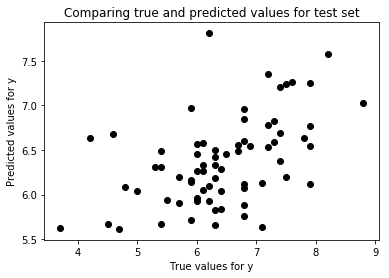

In [93]:
#plot outputs
plt.scatter(y_test,y_pred_test,color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')